In [1]:
import pandas as pd
from io import StringIO
import re
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("../datasets/memory_experiment_merged.csv")
print(len(df), "rows")

96 rows


In [30]:
list(df.columns)

['Unnamed: 0',
 'Name',
 'State',
 'Notes',
 'User',
 'Tags',
 'Created',
 'Runtime',
 'Sweep',
 'GPU Type',
 'GPU Count',
 '_name_or_path',
 'adafactor',
 'adam_beta1',
 'adam_beta2',
 'adam_epsilon',
 'add_cross_attention',
 'architectures',
 'attention_dropout',
 'auto_find_batch_size',
 'bf16',
 'bf16_full_eval',
 'bos_token_id',
 'chunk_size_feed_forward',
 'dataloader_drop_last',
 'dataloader_num_workers',
 'dataloader_persistent_workers',
 'dataloader_pin_memory',
 'ddp_timeout',
 'debug',
 'disable_tqdm',
 'diversity_penalty',
 'do_eval',
 'do_predict',
 'do_sample',
 'do_train',
 'early_stopping',
 'encoder_no_repeat_ngram_size',
 'eos_token_id',
 'eval_delay',
 'eval_steps',
 'evaluation_strategy',
 'fp16',
 'fp16_backend',
 'fp16_full_eval',
 'fp16_opt_level',
 'fsdp',
 'fsdp_config.min_num_params',
 'fsdp_config.xla',
 'fsdp_config.xla_fsdp_grad_ckpt',
 'fsdp_min_num_params',
 'full_determinism',
 'gradient_accumulation_steps',
 'gradient_checkpointing',
 'group_by_length',

In [69]:
relevant_cols = [
    "run_name",
    "State",
    "Runtime",
    "bf16",
    "fp16",
    "gradient_accumulation_steps",
    "gradient_checkpointing",
    "gradient_checkpointing_kwargs.use_reentrant",
    "quantization_config._load_in_4bit",
    "quantization_config._load_in_8bit",
    "quantization_config.bnb_4bit_compute_dtype",
    "quantization_config.bnb_4bit_quant_type",
    "quantization_config.bnb_4bit_use_double_quant",
    "quantization_config.quant_method",
    "per_device_train_batch_size",
    "system/gpu.0.memoryAllocatedBytes__MAX",
]

df_memory = df[relevant_cols]

def fix_gradient_checkpointing(df: pd.DataFrame):
    df['gradient_checkpointing'] = df['run_name'].map(lambda x: bool(int(re.search(r"-gc(\d)-", x).groups()[0])))

def extract_context_length(df: pd.DataFrame):
    df['context_length'] = df['run_name'].map(lambda x: int(re.search(r"-ctx(\d+)-", x).groups()[0]))
    
def extract_rvalue(df: pd.DataFrame):
    df['lora_rvalue'] = df['run_name'].map(lambda x: int(re.search(r"_rv(\d+)-", x).groups()[0]))

def from_bytes_to_gigas(df: pd.DataFrame):
    df['memory_used_gigas'] = df['system/gpu.0.memoryAllocatedBytes__MAX'].map(lambda x: x / 1024**3)

fix_gradient_checkpointing(df_memory)
extract_context_length(df_memory)
extract_rvalue(df_memory)
from_bytes_to_gigas(df_memory)
df_memory.head()

/tmp/ipykernel_51979/632720470.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gradient_checkpointing'] = df['run_name'].map(lambda x: bool(int(re.search(r"-gc(\d)-", x).groups()[0])))
/tmp/ipykernel_51979/632720470.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['context_length'] = df['run_name'].map(lambda x: int(re.search(r"-ctx(\d+)-", x).groups()[0]))
/tmp/ipykernel_51979/632720470.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,run_name,State,Runtime,bf16,fp16,gradient_accumulation_steps,gradient_checkpointing,gradient_checkpointing_kwargs.use_reentrant,quantization_config._load_in_4bit,quantization_config._load_in_8bit,quantization_config.bnb_4bit_compute_dtype,quantization_config.bnb_4bit_quant_type,quantization_config.bnb_4bit_use_double_quant,quantization_config.quant_method,per_device_train_batch_size,system/gpu.0.memoryAllocatedBytes__MAX,context_length,lora_rvalue,memory_used_gigas
0,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,27,True,False,4,True,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,8,NaN,3072,256,NaN
1,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,5,True,False,4,False,NaN,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,8,NaN,3072,256,NaN
2,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,551,True,False,4,True,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,4,4.155019e+10,3072,256,38.696631
3,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,5,True,False,4,False,NaN,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,4,NaN,3072,256,NaN
4,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,finished,2218,True,False,4,True,False,True,False,bfloat16,nf4,True,QuantizationMethod.BITS_AND_BYTES,2,4.277954e+10,3072,256,39.841553


In [ ]:
# Make pie charts success/fail for:
# - lora r values, 32, 64, 128, 256
# - Gradient Checkpointing
# - Batch size, 1, 2, 4, 8

In [45]:
def get_failed_and_success(df):
    return df.loc[df["State"] == "failed"], df.loc[df["State"] == "finished"]

print(len(df_memory.loc[df_memory["gradient_checkpointing"] == True]), "b")
f, s = get_failed_and_success(df_memory.loc[df_memory["gradient_checkpointing"] == True])
print(len(f), "f")
print(len(s), "s")

48 b
12 f
36 s


Gradient Checkpointing ON:
Failed 12
Succeed 36
Gradient Checkpointing OFF:
Failed 32
Succeed 16


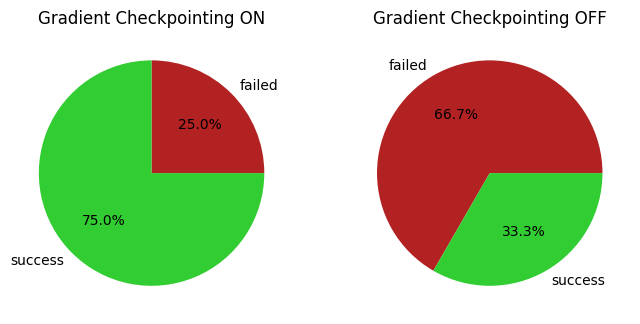

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(8, 8)
f, s = get_failed_and_success(df_memory.loc[df_memory["gradient_checkpointing"] == True])
ax1.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Gradient Checkpointing ON:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["gradient_checkpointing"] == False])
ax2.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Gradient Checkpointing OFF:")
print("Failed", len(f))
print("Succeed", len(s))

ax1.set_title("Gradient Checkpointing ON");
ax2.set_title("Gradient Checkpointing OFF");

Batch Size 1:
Failed 0
Succeed 24
Batch Size 2:
Failed 8
Succeed 16
Batch Size 4:
Failed 16
Succeed 8
Batch Size 8:
Failed 20
Succeed 4
memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql
memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql
memory_experiment-Mistral-7B-Instruct-v0.2_rv64-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql
memory_experiment-Mistral-7B-Instruct-v0.2_rv32-ld0-bs8-ga4-gc1-p0-nta0-e1-ctx1024-q4bit-template-template-stsparql


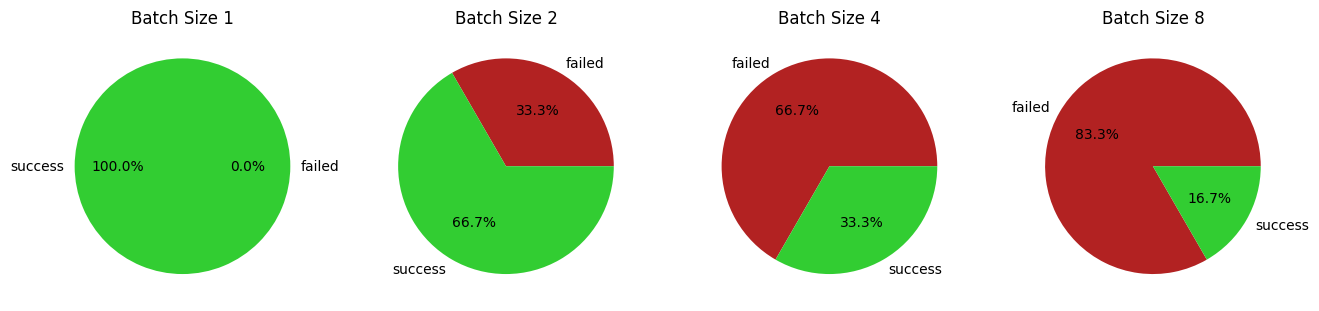

In [89]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(16, 16)

f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 1])
ax1.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 2])
ax2.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 4])
ax3.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["per_device_train_batch_size"] == 8])
ax4.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8:")
print("Failed", len(f))
print("Succeed", len(s))

ax1.set_title("Batch Size 1");
ax2.set_title("Batch Size 2");
ax3.set_title("Batch Size 4");
ax4.set_title("Batch Size 8");

for _,r in s.iterrows():
    print(r["run_name"])

Batch Size 1 & ctx 1024:
Failed 0
Succeed 8
Batch Size 2 & ctx 1024:
Failed 0
Succeed 8
Batch Size 4 & ctx 1024:
Failed 4
Succeed 4
Batch Size 8 & ctx 1024:
Failed 4
Succeed 4
Batch Size 1 & ctx 2048:
Failed 0
Succeed 8
Batch Size 2 & ctx 2048:
Failed 4
Succeed 4
Batch Size 4 & ctx 2048:
Failed 4
Succeed 4
Batch Size 8 & ctx 2048:
Failed 8
Succeed 0
Batch Size 1 & ctx 3072:
Failed 0
Succeed 8
Batch Size 2 & ctx 3072:
Failed 4
Succeed 4
Batch Size 4 & ctx 3072:
Failed 8
Succeed 0
Batch Size 8 & ctx 3072:
Failed 8
Succeed 0


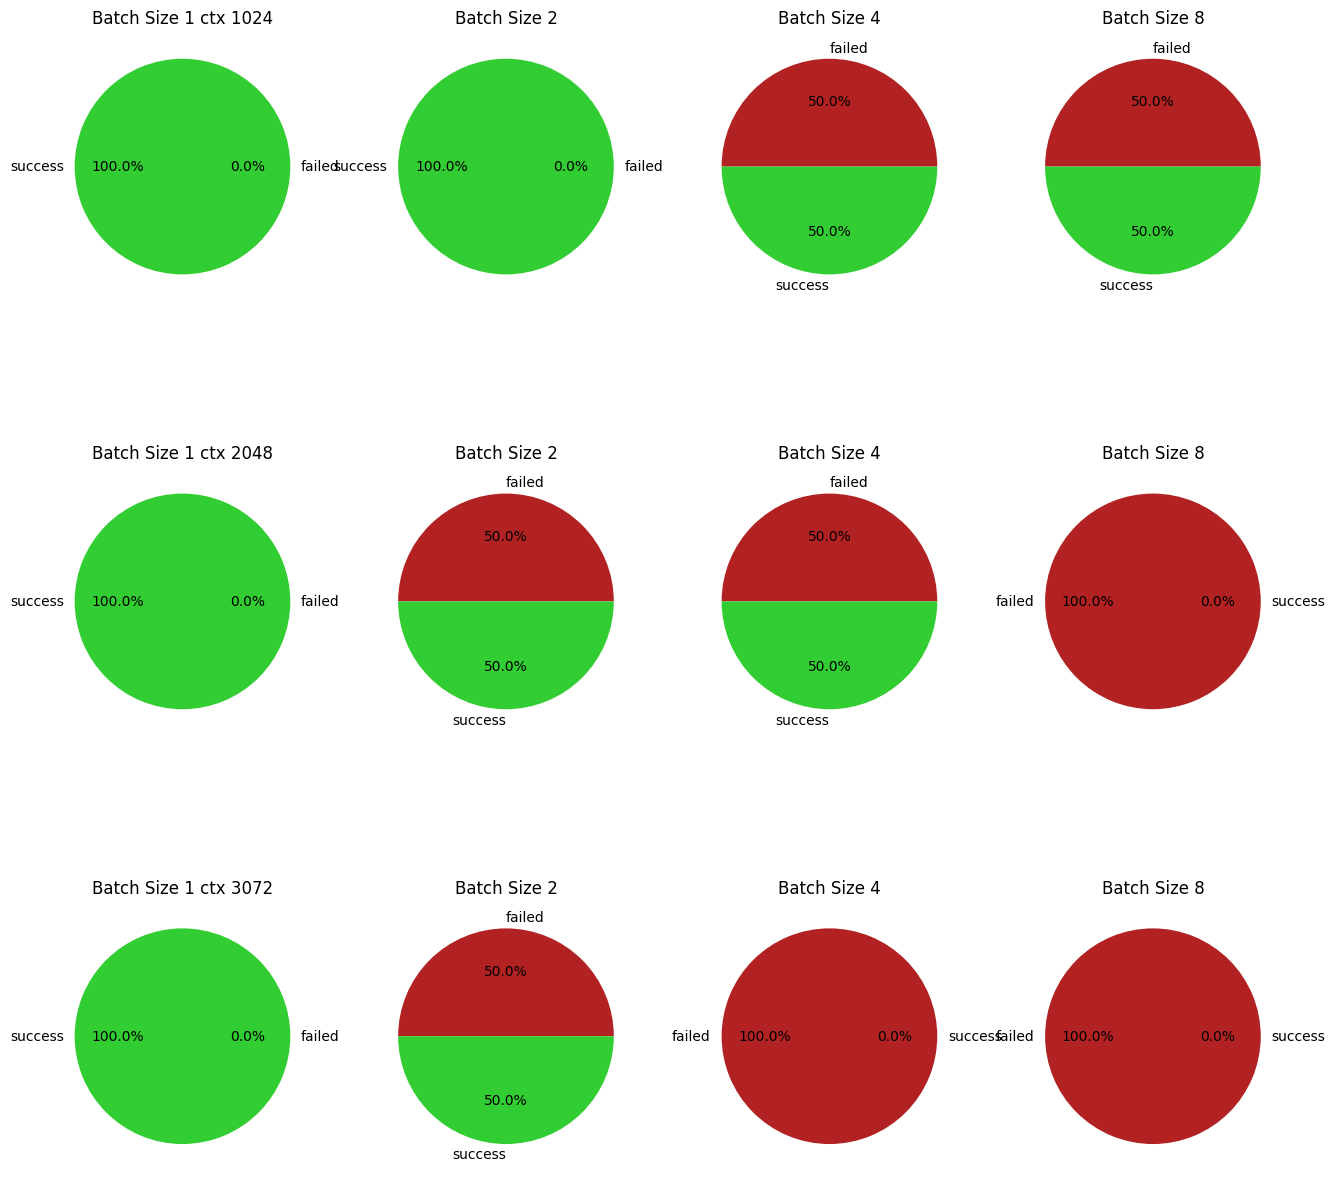

In [96]:
fig, axs = plt.subplots(3, 4)
fig.set_size_inches(16, 16)

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 1) & (df_memory["context_length"] == 1024)])
axs[0][0].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 2) & (df_memory["context_length"] == 1024)])
axs[0][1].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 4) & (df_memory["context_length"] == 1024)])
axs[0][2].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 8) & (df_memory["context_length"] == 1024)])
axs[0][3].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8 & ctx 1024:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 1) & (df_memory["context_length"] == 2048)])
axs[1][0].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 2) & (df_memory["context_length"] == 2048)])
axs[1][1].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 4) & (df_memory["context_length"] == 2048)])
axs[1][2].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 8) & (df_memory["context_length"] == 2048)])
axs[1][3].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8 & ctx 2048:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 1) & (df_memory["context_length"] == 3072)])
axs[2][0].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 1 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 2) & (df_memory["context_length"] == 3072)])
axs[2][1].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 2 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 4) & (df_memory["context_length"] == 3072)])
axs[2][2].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 4 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[(df_memory["per_device_train_batch_size"] == 8) & (df_memory["context_length"] == 3072)])
axs[2][3].pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Batch Size 8 & ctx 3072:")
print("Failed", len(f))
print("Succeed", len(s))

axs[0][0].set_title("Batch Size 1 ctx 1024");
axs[0][1].set_title("Batch Size 2");
axs[0][2].set_title("Batch Size 4");
axs[0][3].set_title("Batch Size 8");
axs[1][0].set_title("Batch Size 1 ctx 2048");
axs[1][1].set_title("Batch Size 2");
axs[1][2].set_title("Batch Size 4");
axs[1][3].set_title("Batch Size 8");
axs[2][0].set_title("Batch Size 1 ctx 3072");
axs[2][1].set_title("Batch Size 2");
axs[2][2].set_title("Batch Size 4");
axs[2][3].set_title("Batch Size 8");

Lora Rvalue 32:
Failed 11
Succeed 13
Lora Rvalue 64:
Failed 11
Succeed 13
Lora Rvalue 128:
Failed 11
Succeed 13
Lora Rvalue 256:
Failed 11
Succeed 13


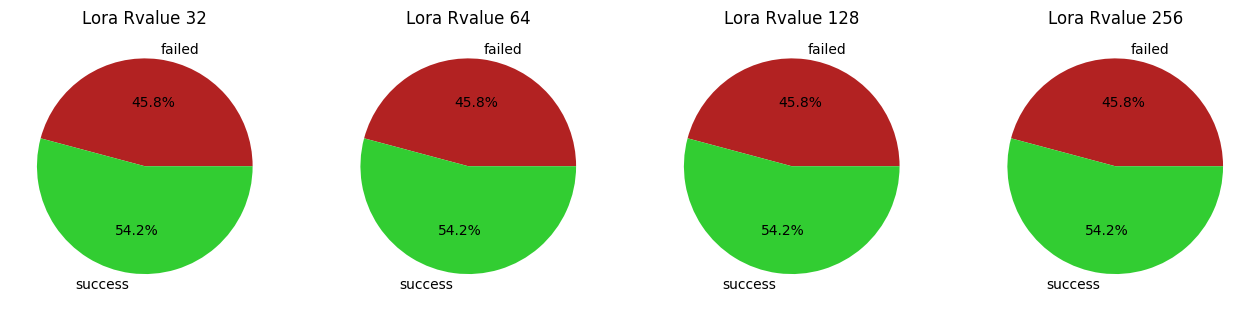

In [86]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(16, 16)

f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 32])
ax1.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 32:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 64])
ax2.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 64:")
print("Failed", len(f))
print("Succeed", len(s))


f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 128])
ax3.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 128:")
print("Failed", len(f))
print("Succeed", len(s))

f, s = get_failed_and_success(df_memory.loc[df_memory["lora_rvalue"] == 256])
ax4.pie([len(f), len(s)], labels=["failed", "success"], autopct='%1.1f%%', colors=["firebrick", "limegreen"]);

print("Lora Rvalue 256:")
print("Failed", len(f))
print("Succeed", len(s))

ax1.set_title("Lora Rvalue 32");
ax2.set_title("Lora Rvalue 64");
ax3.set_title("Lora Rvalue 128");
ax4.set_title("Lora Rvalue 256");

In [5]:
# mistral_data = df_memory.loc[df_memory.run_name.str.contains('mistral', case=False)]
# llama_data = df_memory.loc[df_memory.run_name.str.contains('llama', case=False)]

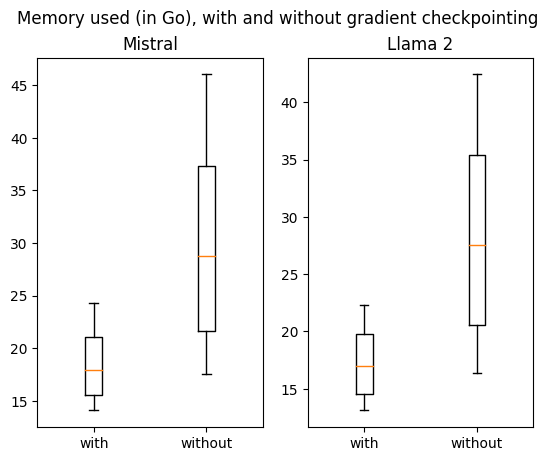

In [6]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# data_sep_gc_mistral = [
#     mistral_data.loc[(mistral_data['gradient_checkpointing'] == True)].memory_used_gigas,
#     mistral_data.loc[(mistral_data['gradient_checkpointing'] == False)].memory_used_gigas
#     ]

# data_sep_gc_llama = [
#     llama_data.loc[(llama_data['gradient_checkpointing'] == True)].memory_used_gigas,
#     llama_data.loc[(llama_data['gradient_checkpointing'] == False)].memory_used_gigas
#     ]
# labels = ["with", "without"]
# ax1.boxplot(x=data_sep_gc_mistral, labels=labels)
# ax1.set_title("Mistral")

# ax2.boxplot(x=data_sep_gc_llama, labels=labels)
# ax2.set_title("Llama 2")
# fig.suptitle('Memory used (in Go), with and without gradient checkpointing')
# plt.show()

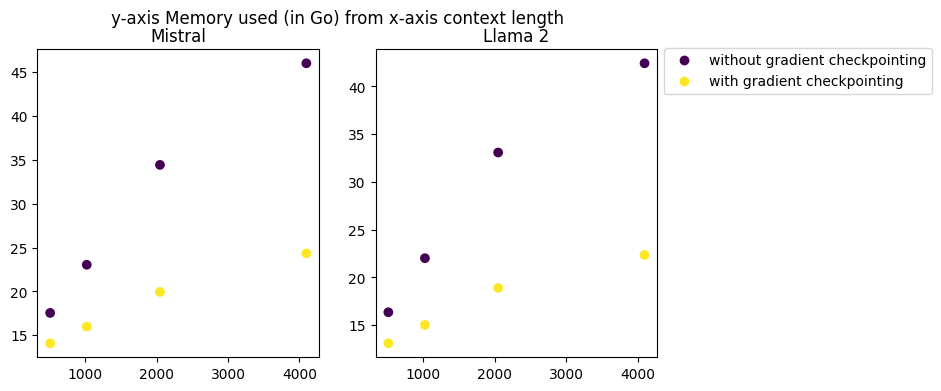

In [7]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.set_size_inches(8, 4)

# ax1.scatter(x=mistral_data.context_length, y=mistral_data.memory_used_gigas, c=mistral_data.gradient_checkpointing)
# ax1.set_title("Mistral")

# scatter = ax2.scatter(x=llama_data.context_length, y=llama_data.memory_used_gigas, c=llama_data.gradient_checkpointing)
# ax2.set_title("Llama 2")
# fig.suptitle('y-axis Memory used (in Go) from x-axis context length')
# fig.legend(
#     handles=scatter.legend_elements()[0],
#     labels=["without gradient checkpointing", "with gradient checkpointing"],
#     loc="upper left",
#     bbox_to_anchor=(0.9, 0.9)
#     )
# plt.show()

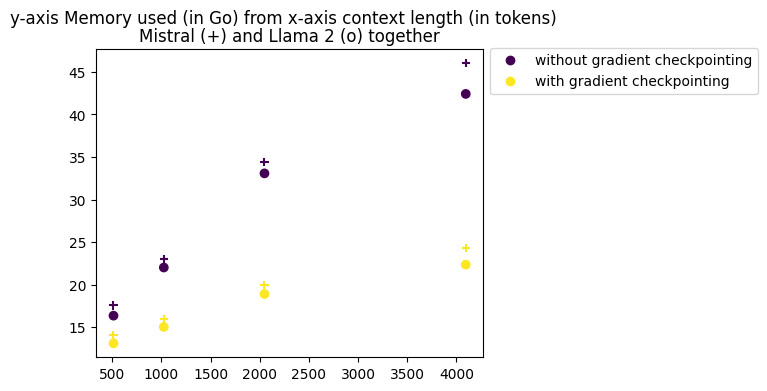

In [8]:
# fig, ax = plt.subplots()
# fig.set_size_inches(5, 4)

# scatter = ax.scatter(
#     x=mistral_data.context_length,
#     y=mistral_data.memory_used_gigas,
#     c=mistral_data.gradient_checkpointing,
#     marker="+"
#     )
# scatter = ax.scatter(
#     x=llama_data.context_length,
#     y=llama_data.memory_used_gigas,
#     c=llama_data.gradient_checkpointing,
#     marker="o"
#     )
# ax.set_title("Mistral (+) and Llama 2 (o) together")

# fig.suptitle('y-axis Memory used (in Go) from x-axis context length (in tokens)')
# fig.legend(
#     handles=scatter.legend_elements()[0],
#     labels=["without gradient checkpointing", "with gradient checkpointing"],
#     loc="upper left",
#     bbox_to_anchor=(0.9, 0.9)
#     )
# plt.show()

# Merging dataset

In [2]:
df = pd.read_csv("../datasets/memory_experiment.csv")
df.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,GPU Type,GPU Count,...,eval/meteor,eval/cross_rr,eval/gnv_rr,eval/id_rr,train/grad_norm,total_flos,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T20:03:10.000Z,27,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T20:02:28.000Z,5,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T19:52:40.000Z,551,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T19:52:00.000Z,5,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,finished,-,alexis-strappazzon,NaN,2024-04-18T19:14:26.000Z,2218,NaN,NVIDIA RTX A6000,1,...,0.79653,0.0,0.0,0.0,1.015625,4.941463e+16,0.401494,2203.5753,0.873,0.109


In [3]:
df_to_merge = pd.read_csv("../datasets/memory_experiment_bytes.csv")
df_to_merge.head()

,Step,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - _runtime,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - _runtime__MIN,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - _runtime__MAX,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes__MIN,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes__MAX,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs2-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - _runtime,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs2-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - _runtime__MIN,memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs2-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql - _runtime__MAX,...,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc1-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - _runtime__MAX,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc1-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc1-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes__MIN,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc1-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes__MAX,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc0-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - _runtime,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc0-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - _runtime__MIN,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc0-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - _runtime__MAX,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc0-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc0-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes__MIN,memory_experiment-Mistral-7B-Instruct-v0.2_rv128-ld0-bs1-ga4-gc0-p0-nta0-e1-ctx2048-q4bit-template-template-stsparql - system/gpu.0.memoryAllocatedBytes__MAX
0,NaN,314.385364,60.780976,545.069756,3.755770e+10,2.984165e+10,4.155019e+10,1140.823761,60.767536,2213.451543,...,2326.802938,1.489683e+10,1.076204e+10,15579480064,945.635824,60.73497,1817.988653,2.919416e+10,1.915610e+10,30880301056


In [12]:
def col_to_model_col(col):
    col_split = col.rfind(" - ")
    col_name = col[col_split+3:]
    model_name = col[:col_split]
    return model_name, col_name

col_to_model_col(df_to_merge.columns[1])

('memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql',
 '_runtime')

In [24]:
the_data = {}
for col in df_to_merge.columns[1:]:
    data = df_to_merge[col].item()
    model_name, col_name = col_to_model_col(col)
    
    if model_name not in the_data.keys():
        the_data.update({model_name: {col_name: data}})
    else:
        the_data[model_name].update({col_name: data})
df_the_data = pd.DataFrame.from_dict(data=the_data, orient='index')
df_the_data.head()

,_runtime,_runtime__MIN,_runtime__MAX,system/gpu.0.memoryAllocatedBytes,system/gpu.0.memoryAllocatedBytes__MIN,system/gpu.0.memoryAllocatedBytes__MAX
memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs4-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql,314.385364,60.780976,545.069756,3.755770e+10,2.984165e+10,4.155019e+10
memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs2-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql,1140.823761,60.767536,2213.451543,3.782499e+10,1.722868e+10,4.277954e+10
memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs2-ga4-gc0-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql,254.210557,60.820636,427.919208,4.637676e+10,3.615240e+10,4.725277e+10
memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs1-ga4-gc1-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql,1246.284891,61.134032,2431.447658,1.845849e+10,1.105970e+10,2.046584e+10
memory_experiment-Mistral-7B-Instruct-v0.2_rv256-ld0-bs1-ga4-gc0-p0-nta0-e1-ctx3072-q4bit-template-template-stsparql,1020.688334,60.786566,1965.488121,3.897082e+10,1.934499e+10,4.357436e+10


In [25]:
df_merged = df.join(df_the_data, how="left", on="Name")
df_merged.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,GPU Type,GPU Count,...,train_loss,train_runtime,train_samples_per_second,train_steps_per_second,_runtime,_runtime__MIN,_runtime__MAX,system/gpu.0.memoryAllocatedBytes,system/gpu.0.memoryAllocatedBytes__MIN,system/gpu.0.memoryAllocatedBytes__MAX
0,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T20:03:10.000Z,27,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T20:02:28.000Z,5,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T19:52:40.000Z,551,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,314.385364,60.780976,545.069756,3.755770e+10,2.984165e+10,4.155019e+10
3,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,failed,-,alexis-strappazzon,NaN,2024-04-18T19:52:00.000Z,5,NaN,NVIDIA RTX A6000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,memory_experiment-Mistral-7B-Instruct-v0.2_rv2...,finished,-,alexis-strappazzon,NaN,2024-04-18T19:14:26.000Z,2218,NaN,NVIDIA RTX A6000,1,...,0.401494,2203.5753,0.873,0.109,1140.823761,60.767536,2213.451543,3.782499e+10,1.722868e+10,4.277954e+10


In [26]:
len(df_merged)

96

In [27]:
df_merged.to_csv("../datasets/memory_experiment_merged.csv")